<a href="https://colab.research.google.com/github/Dipendra7/2015lab1/blob/master/Deeplearning_and_spiking_neural_network_cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1:**Cart Pole Gym using Reinforcement Learning**

Installing libraries:

In [ ]:
!pip install tensorflow==2.11.0
!pip install keras==2.11.0
!pip install keras-rl2
!pip install gym[classic_control]

In [2]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import gym
import random
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
import matplotlib.pyplot as plt

In [3]:
env = gym.make('CartPole-v1')
states = env.observation_space.shape[0]
actions = env.action_space.n
actions

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


2

Here you can see the environment where keras is not used

In [4]:
scoress = []
episodes = 50
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    while  not done:
        #env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scoress.append(score)

Episode:1 Score:21.0
Episode:2 Score:19.0
Episode:3 Score:42.0
Episode:4 Score:12.0
Episode:5 Score:14.0
Episode:6 Score:9.0
Episode:7 Score:9.0
Episode:8 Score:23.0
Episode:9 Score:15.0
Episode:10 Score:23.0
Episode:11 Score:13.0
Episode:12 Score:47.0
Episode:13 Score:21.0
Episode:14 Score:16.0
Episode:15 Score:28.0
Episode:16 Score:22.0
Episode:17 Score:9.0
Episode:18 Score:21.0
Episode:19 Score:16.0
Episode:20 Score:10.0
Episode:21 Score:15.0
Episode:22 Score:34.0
Episode:23 Score:15.0
Episode:24 Score:23.0
Episode:25 Score:20.0
Episode:26 Score:18.0
Episode:27 Score:16.0
Episode:28 Score:35.0
Episode:29 Score:13.0
Episode:30 Score:19.0
Episode:31 Score:20.0
Episode:32 Score:29.0
Episode:33 Score:17.0
Episode:34 Score:13.0
Episode:35 Score:31.0
Episode:36 Score:31.0
Episode:37 Score:19.0
Episode:38 Score:19.0
Episode:39 Score:59.0
Episode:40 Score:18.0
Episode:41 Score:17.0
Episode:42 Score:15.0
Episode:43 Score:12.0
Episode:44 Score:36.0
Episode:45 Score:27.0
Episode:46 Score:24.0


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


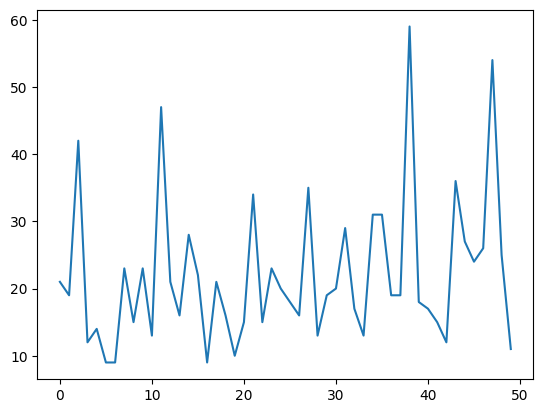

In [5]:
plt.plot(range(episode), scoress)
plt.rcParams["figure.figsize"] = (27,8)
plt.show()

the agent is untrained yet, so it cannot make more than a couple of steps

**Build Model:**

In [6]:
def Building_Model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model
model =Building_Model(states, actions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Build Agent:
There is we use DQNAgent for building agent

In [7]:
def Building_Agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=5000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [8]:
dqn = Building_Agent(model, actions)
dqn.compile(tf.keras.optimizers.legacy.Adam(learning_rate=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=5000, visualize=False, verbose=1)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training for 5000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 12:30 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.10/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   31/10000 [..............................] - ETA: 4:02 - reward: 1.0000

/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.10/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch

 4999/10000 [=============>................] - ETA: 52s - reward: 1.0000done, took 52.320 seconds


In [19]:
scores = dqn.test(env, nb_episodes=50, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 50 episodes ...
Episode 1: reward: 400.000, steps: 400
Episode 2: reward: 303.000, steps: 303
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 309.000, steps: 309
Episode 5: reward: 500.000, steps: 500
Episode 6: reward: 341.000, steps: 341
Episode 7: reward: 240.000, steps: 240
Episode 8: reward: 429.000, steps: 429
Episode 9: reward: 395.000, steps: 395
Episode 10: reward: 306.000, steps: 306
Episode 11: reward: 322.000, steps: 322
Episode 12: reward: 228.000, steps: 228
Episode 13: reward: 446.000, steps: 446
Episode 14: reward: 412.000, steps: 412
Episode 15: reward: 338.000, steps: 338
Episode 16: reward: 276.000, steps: 276
Episode 17: reward: 272.000, steps: 272
Episode 18: reward: 215.000, steps: 215
Episode 19: reward: 291.000, steps: 291
Episode 20: reward: 249.000, steps: 249
Episode 21: reward: 410.000, steps: 410
Episode 22: reward: 322.000, steps: 322
Episode 23: reward: 224.000, steps: 224
Episode 24: reward: 272.000, steps: 272
Episode 25: reward: 2

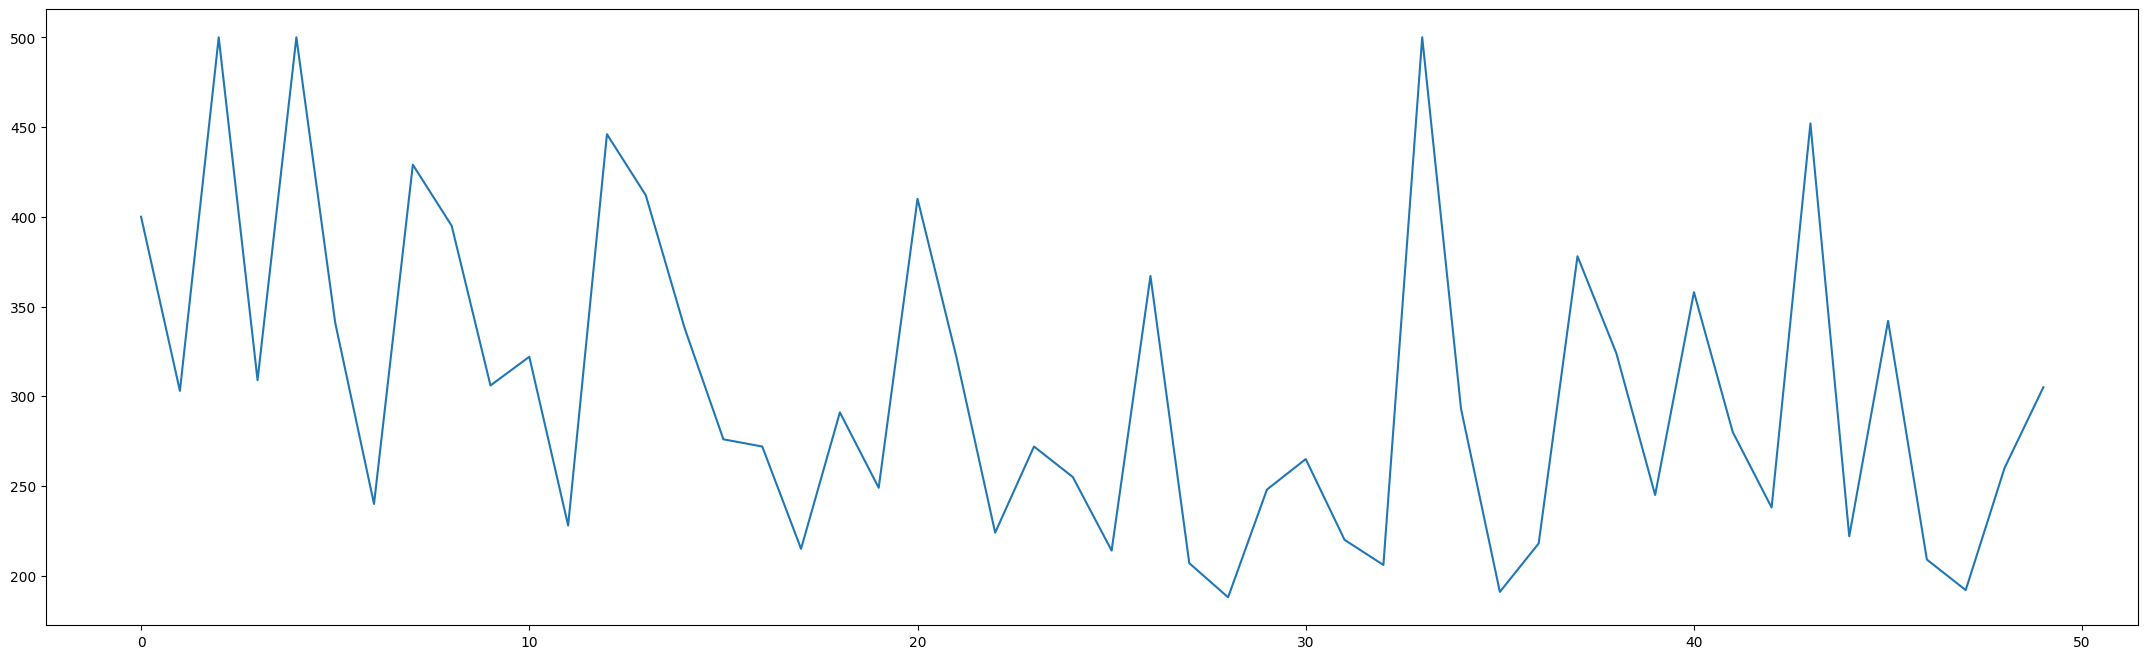

In [20]:
plt.plot(range(50), scores.history['episode_reward'])
plt.rcParams["figure.figsize"] = (27,8)
plt.show()

our highest score before using deep learning was 90 but after using deep learning our score increased significantly to 500

**2: USING SPYX SPIKING NEURAL NETWORK**

In [ ]:
!pip install spyx[data]
!pip install evosax
!pip install gymnax

In [2]:
import spyx
import spyx.nn as snn

# JAX imports
import os
import jax
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = ".70"
from jax import numpy as jnp

from tqdm import tqdm

# implement our SNN in DeepMind's Haiku
import haiku as hk

# optimize the parameters using evosax
import evosax
from evosax.strategies import OpenES as ES

import gymnax

# rendering tools
import matplotlib.pyplot as plt
#%matplotlib notebook

In [3]:
rng = jax.random.PRNGKey(0)
rng, key_reset, key_act, key_step = jax.random.split(rng, 4)

# Instantiate the environment & its settings.
env, env_params = gymnax.make("CartPole-v1")

# Reset the environment.
obs, state = env.reset(key_reset, env_params)

# Sample a random action.
action = env.action_space(env_params).sample(key_act)

# Perform the step transition.
n_obs, n_state, reward, done, _ = env.step(key_step, state, action, env_params)
done

/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)


Array(False, dtype=bool)

In [4]:
class binarize:
    def __init__(self, neuron_count, min_val, max_val):
        self.neuron_count = neuron_count
        self.min_val = min_val
        self.max_val = max_val

    def __call__(self, obs):
        digital = jnp.digitize(obs, jnp.linspace(self.min_val, self.max_val, self.neuron_count))
        return jax.nn.one_hot(digital, self.neuron_count)

class NeuromorphicCartpole:
    def __init__(self, angle_neurons=16, cart_v_neurons=16, pole_w_neurons=16):
        self.angle_converter = binarize(angle_neurons, -.21, .21)
        self.v_converter = binarize(cart_v_neurons, -3.5, 3.5)
        self.w_converter = binarize(pole_w_neurons, -3.5, 3.5)

    def __call__(self, obs):
        cart_v = self.v_converter(obs[1]) #self.v_converter(obs[1])
        theta = self.angle_converter(obs[2])
        pole_w = self.w_converter(obs[3]) #self.w_converter(obs[3])

        return jnp.concatenate([cart_v, theta, pole_w])

In [5]:
adapter = NeuromorphicCartpole()

SNN

In [6]:
# push the cart left or right based on which LI neuron has the higher membrane potential.
def action_selection(spike_trains):
    return jnp.argmax(spike_trains, axis=0)

def controller(x, state):
    # seqs is [T, F].
    core = hk.DeepRNN([
        #snn.LIF(64,beta =0.8, activation=spyx.axn.arctan()),
        hk.Linear(64, with_bias=False),
        snn.LIF((64,), beta =0.8,),
        hk.Linear(2, with_bias=False),
        snn.LI((2,))
    ])

    spikes, out_state = core(x, state) # note here, instead of unrolling the SNN we have to manually pass the network state in and out
    return spikes, out_state           # this is because we are stepping the simulation and SNN in tandem.

In [7]:
key = jax.random.PRNGKey(0)
init_state = (jnp.zeros(64), jnp.zeros(2))
policy = hk.without_apply_rng(hk.transform(controller))
policy_params = policy.init(rng=key, x=adapter(obs), state=init_state)

In [8]:
policy.apply(policy_params, adapter(obs), init_state)

(Array([0., 0.], dtype=float32),
 (Array([ 0.16964892,  0.5141022 , -0.09112424, -0.18181202, -0.145446  ,
          0.23649064, -0.09262012, -0.08848015,  0.11664729,  0.24404779,
          0.31869256,  0.3869602 ,  0.19660227, -0.03745356, -0.05304112,
          0.3056667 ,  0.07718394,  0.1708976 , -0.21313898, -0.344912  ,
         -0.24763231, -0.04124495,  0.03419027, -0.1731914 ,  0.2518271 ,
         -0.29428682,  0.07899474, -0.12332906,  0.27954382, -0.03600938,
          0.03087013, -0.31298283,  0.12517779, -0.0249256 ,  0.41489154,
         -0.00283931,  0.04712863,  0.07251973, -0.17288034, -0.0770252 ,
          0.10979734, -0.00819778, -0.11719832, -0.5740692 , -0.22288811,
          0.11991899, -0.2503491 , -0.21484517,  0.11607231,  0.00887432,
          0.06059058, -0.19645458, -0.19393852,  0.14266899,  0.06141619,
          0.00783545,  0.10007939, -0.25339204, -0.36541682,  0.18963584,
          0.17901751,  0.11905757, -0.12810999, -0.08214023], dtype=float32),
 

In [9]:
adapter(obs).shape

(48,)

In [10]:
# Instantiate the environment & its settings.
env, env_params = gymnax.make("CartPole-v1")

def rollout(policy_params, init_policy_state, env_params, rng_input, steps_in_episode):
    """Rollout a jitted gymnax episode with lax.scan."""
    # Reset the environment
    rng_reset, rng_episode = jax.random.split(rng_input)
    obs, env_state = env.reset(rng_reset, env_params)

    def policy_step(state_input, tmp):
        """lax.scan compatible step transition in jax env."""

        # first unpack all of our state variables.
        obs, env_state, policy_params, policy_state, prev_done, rng = state_input
        # split our RNG apart.
        rng, rng_step, rng_net = jax.random.split(rng, 3)
        # get the network activity from the controller
        activation, new_policy_state = policy.apply(policy_params, adapter(obs), policy_state)
        action = action_selection(activation)
        next_obs, next_state, reward, done, _ = env.step(
            rng_step, env_state, action, env_params
        )
        carry = [next_obs, next_state, policy_params, new_policy_state, prev_done + done, rng]
        return carry, [obs, action, reward, next_obs, prev_done+done]

    # Scan over episode step loop
    _, scan_out = jax.lax.scan(
        policy_step,
        [obs, env_state, policy_params, init_policy_state,
         False, rng_episode],
        (),
        steps_in_episode
    )
    # Return masked sum of rewards accumulated by agent in episode
    obs, action, reward, next_obs, done = scan_out
    return obs, action, reward, next_obs, done

jit_rollout = jax.jit(rollout, static_argnums=[4]) # compile the rollout/simulation function
vector_rollout = jax.vmap(jit_rollout, (0,None,None,None,None)) # autovectorize the rollout function across our population of parameters.

In [11]:
def evolution(SNN, params, epochs=50, trials=32, steps=5000, key=0):

    rng = jax.random.PRNGKey(key)
    param_reshaper = evosax.ParameterReshaper(params)

    # Instantiate and initialize the evolution strategy
    strategy = ES(popsize=128,
                      num_dims=param_reshaper.total_params,
                      opt_name="adam"
                    )

    es_params = strategy.default_params
    es_params = es_params.replace(sigma_init=0.1, sigma_decay=0.999, sigma_limit=0.01)
    es_params = es_params.replace(opt_params=es_params.opt_params.replace(
        lrate_init=0.1, lrate_decay=0.999, lrate_limit=0.001))

    # check the initialization here....
    strat_state = strategy.initialize(rng, es_params)

    @jax.jit
    def step(rng, pop):
        rng, rng_eval = jax.random.split(rng)
        # ASK
        population_params = param_reshaper.reshape(pop)
        init_policy_state = init_state

        # EVAL
        obs, action, reward, next_obs, done = \
            vector_rollout(population_params, init_policy_state, env_params, rng_eval, steps)


        # TELL
        total_reward = jnp.sum(reward*(1-done), axis=-1)
        return rng, total_reward, done


    # this code here can be refactored to be fully JIT compiled for even greater performance.
    for gen in range(epochs):

        # figure out way to JIT this inner loop better to account for trials
        total_reward = jnp.zeros([128])

        rng, rng_ask = jax.random.split(rng)
        pop, strat_state = strategy.ask(rng_ask, strat_state)


        pbar = tqdm([*range(trials)])
        pbar.set_description("Epoch #{}".format(gen))
        for trials_so_far in pbar:

            rng, reward, done = step(rng, pop)
            total_reward += reward
            pbar.set_postfix(Reward=jnp.max(total_reward)/(trials_so_far+1))

        strat_state = strategy.tell(pop, -total_reward/trials, strat_state)


    elite = param_reshaper.reshape(jnp.array([strat_state.best_member]))
    return jax.tree_util.tree_map(jnp.squeeze, elite)

In [12]:
elite_params = evolution(policy, policy_params)

ParameterReshaper: 3203 parameters detected for optimization.


Epoch #49: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s, Reward=499.0]
